In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [128]:
entrenamiento_df = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')

In [129]:
entrenamiento_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [543]:
entrenamiento_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [544]:
entrenamiento_df['keyword'].value_counts().head(10)

fatalities     45
deluge         42
armageddon     42
harm           41
damage         41
body%20bags    41
sinking        41
evacuate       40
fear           40
siren          40
Name: keyword, dtype: int64

In [545]:
entrenamiento_df['location'].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [546]:
entrenamiento_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [130]:
# Quito la columna 'text' y la reemplazo por la columna  
# 'longitud_text' que contiene la longitud de la columna 'text'. 
entrenamiento_df['text']=entrenamiento_df['text'].astype(str)
entrenamiento_df['longitud_text']=entrenamiento_df.text.str.len()
#entrenamiento_df=entrenamiento_df[['id','keyword','location','target','longitud_text']]
entrenamiento_df.head(10)


,id,keyword,location,text,target,longitud_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


/home/gaston/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Densidad')

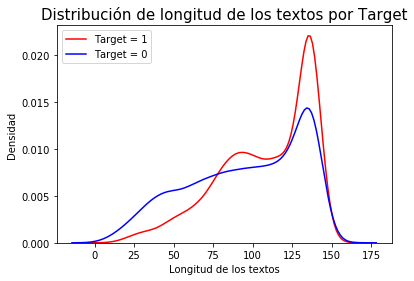

In [548]:
# hago un plot de la longitud de textos por target
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 1]['longitud_text'], color = 'red',hist=False, rug=False, label = 'Target = 1')
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 0]['longitud_text'], color = 'blue',hist=False, rug=False, label = 'Target = 0')

plot.set_title("Distribución de longitud de los textos por Target",size=15)
plot.set_xlabel('Longitud de los textos', size=10)
plot.set_ylabel('Densidad',size=10)


In [549]:
#agrupo por target y longitud del texto(promedio y cantidad). 
longitud_target = entrenamiento_df.loc[:,['longitud_text','target']].groupby('target')\
                .agg(['mean','count'])
longitud_target

longitud_text      
                mean count
target                    
0          95.706817  4342
1         108.113421  3271

In [550]:
# acomodo las columnas
level0 = longitud_target.columns.get_level_values(0)
level1 = longitud_target.columns.get_level_values(1)

longitud_target.columns= level0 + '_' + level1
longitud_target =longitud_target.reset_index()
longitud_target


,target,longitud_text_mean,longitud_text_count
0,0,95.706817,4342
1,1,108.113421,3271


Text(0, 0.5, 'Longitud')

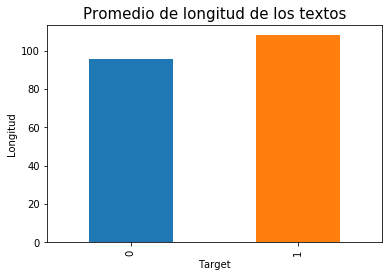

In [551]:
#grafico de promedio de longitud de los textos, por target
longitud_target_promedio= longitud_target.loc[:, 'longitud_text_mean']
longitud_target_promedio.plot(kind = 'bar')
plt.title('Promedio de longitud de los textos', size=15)
plt.xlabel('Target')
plt.ylabel('Longitud')

Text(0, 0.5, 'Cantidad')

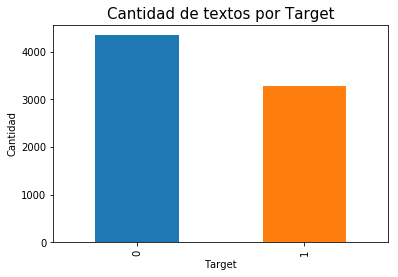

In [552]:
#grafico de cantidad de los textos, por target
longitud_target_cantidad= longitud_target.loc[:, 'longitud_text_count']
grafico=longitud_target_cantidad.plot(kind = 'bar')
plt.title('Cantidad de textos por Target', size=15)
plt.xlabel('Target')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Keyword')

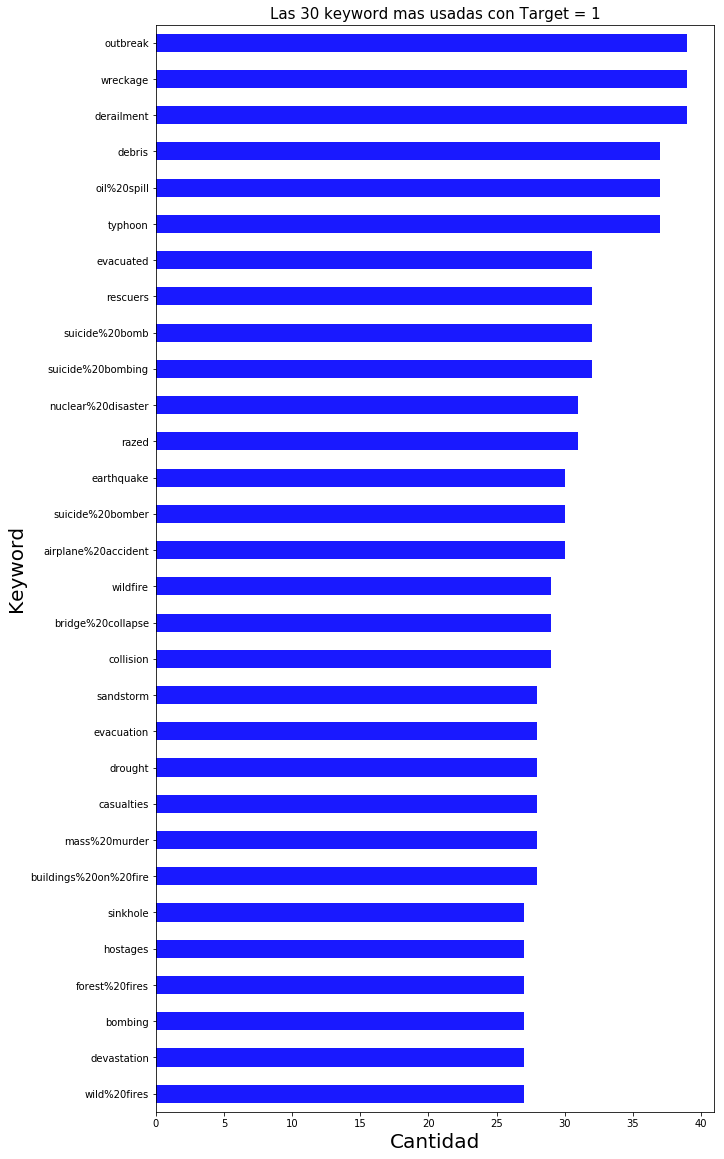

In [553]:
# Grafico con las primeras 30 keyword mas usadas de Target 1. 
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 1].value_counts().sort_values().tail(30)\
        .plot(kind='barh', alpha=0.9, color='blue')
plt.title("Las 30 keyword mas usadas con Target = 1",size=15)
plt.xlabel('Cantidad', size=20)
plt.ylabel('Keyword',size=20)

Text(0, 0.5, 'Keyword')

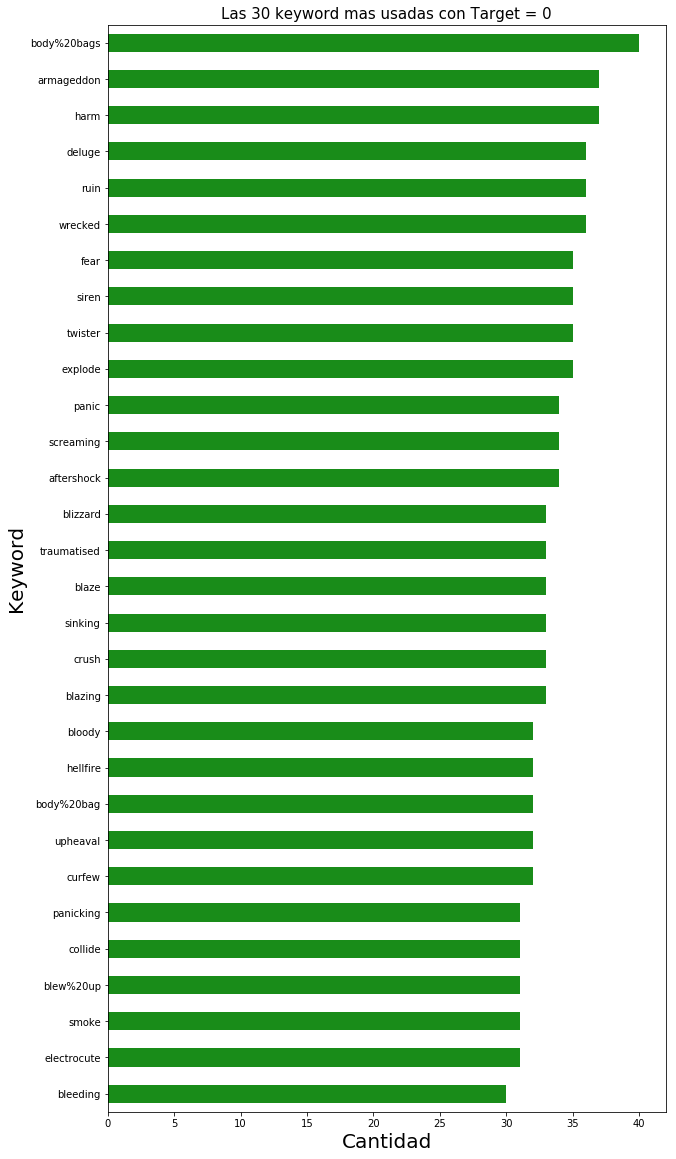

In [554]:
# Grafico con las primeras 30 keyword mas usadas de Target 0. 
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 0].value_counts().sort_values().tail(30)\
        .plot(kind='barh', alpha=0.9, color='green')
plt.title("Las 30 keyword mas usadas con Target = 0",size=15)
plt.xlabel('Cantidad', size=20)
plt.ylabel('Keyword',size=20)

In [555]:
#quito los 'NaN' en las columnas 'location','target'
location_target = pd.DataFrame(entrenamiento_df,columns=['location','target'])
location_target =location_target.dropna()
location_target.head(30)

,location,target
31,Birmingham,1
32,Est. September 2012 - Bristol,0
33,AFRICA,1
34,"Philadelphia, PA",0
35,"London, UK",0
36,Pretoria,0
37,World Wide!!,1
39,Paranaque City,0
40,Live On Webcam,0
42,milky way,0


Text(0, 0.5, 'location')

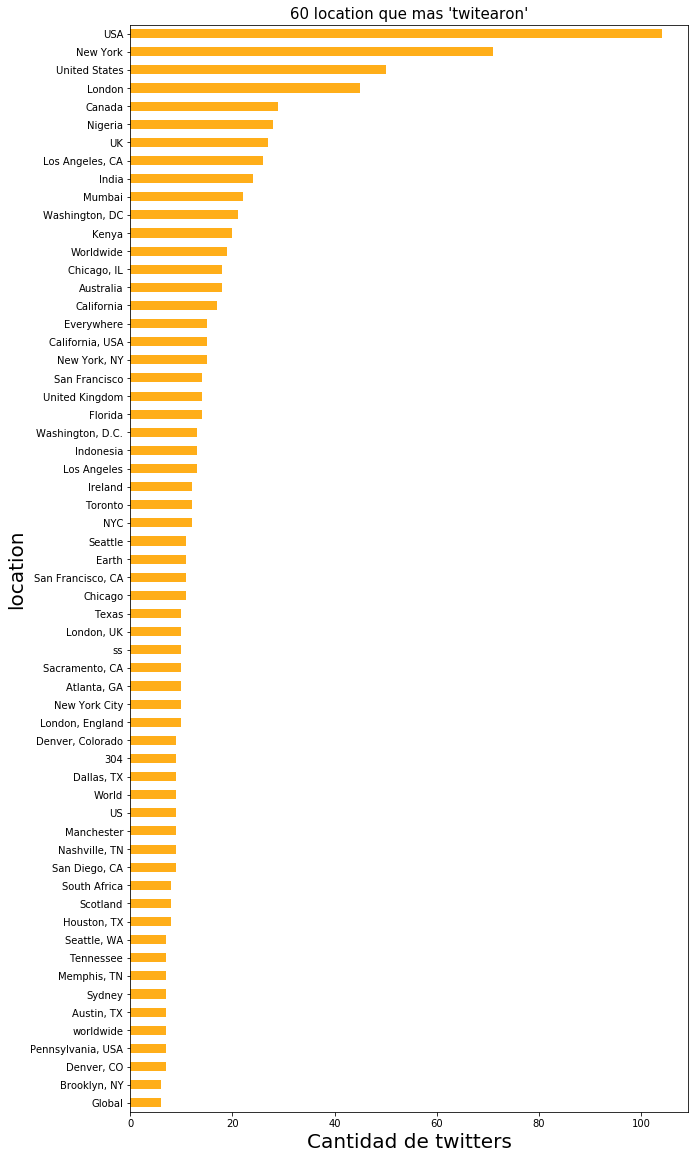

In [568]:
# Grafico con las primeras 60 location que mas twittearon. 
plt.figure(figsize=(10, 20)) 
location_target['location'].value_counts().sort_values().tail(60)\
        .plot(kind='barh', alpha=0.9, color='orange')
plt.title("60 location que mas 'twitearon'",size=15)
plt.xlabel('Cantidad de twitters', size=20)
plt.ylabel('location',size=20)

### Cantidad de tweets verdaderos y totales segun si tienen o no una localidad

In [77]:
# Divido el data frame entre los que tienen localidad y los que no
df_con_localidad = entrenamiento_df[entrenamiento_df['location'].fillna(0) != 0].copy()
df_sin_localidad = entrenamiento_df[entrenamiento_df['location'].fillna(0) == 0].copy()

In [78]:
df_con_localidad.count()

id          5080
keyword     5080
location    5080
text        5080
target      5080
dtype: int64

In [79]:
df_sin_localidad.count()

id          2533
keyword     2472
location       0
text        2533
target      2533
dtype: int64

In [80]:
df_con_localidad.loc[:,'location'] = 'Con localidad'
df_sin_localidad.loc[:,'location'] = 'Sin localidad'

In [81]:
df_localidades = df_con_localidad.append(df_sin_localidad)
df_localidades = df_localidades.groupby('location')['target'].agg(['sum','count'])
df_localidades.columns = ['verdaderos','totales']
df_localidades['falsos'] = df_localidades['totales'] - df_localidades['verdaderos']
df_localidades.head()

,verdaderos,totales,falsos
location,,,
Con localidad,2196,5080,2884
Sin localidad,1075,2533,1458


Text(0,0.5,'Cantidad de tweets')

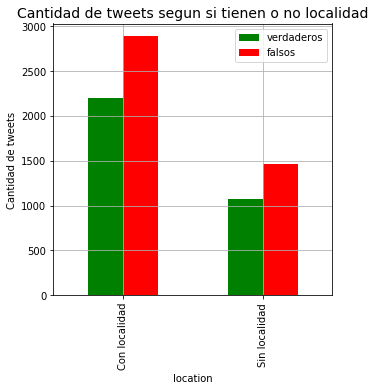

In [85]:
grafico = df_localidades.loc[:,['verdaderos','falsos']].plot(kind='bar', grid=True, figsize=(5,5), color=['green','red'])
grafico.set_title('Cantidad de tweets segun si tienen o no localidad', fontsize=14)
grafico.set_ylabel('Cantidad de tweets')

### Largo del texto segun las 5 localidades en los que se registraron más tweets verdaderos

In [68]:
df_localidad = entrenamiento_df.groupby('location').agg({'target':['sum','count']})
df_localidad.columns = ['verdaderos','totales']
df_localidad = df_localidad.sort_values('totales', ascending=False)
df_localidad.head()

,verdaderos,totales
location,,
USA,67,104
New York,16,71
United States,27,50
London,16,45
Canada,13,29


In [69]:
df_localidad['falsos'] = df_localidad['totales'] - df_localidad['verdaderos']
del df_localidad['totales']
df_localidad.head()

,verdaderos,falsos
location,,
USA,67,37
New York,16,55
United States,27,23
London,16,29
Canada,13,16


In [70]:
# Me quedo con los 5 de mayor cantidad
localidades = df_localidad.sort_values('verdaderos', ascending=False).reset_index().loc[0:4,'location']
localidades

0              USA
1    United States
2          Nigeria
3            India
4           Mumbai
Name: location, dtype: object

In [71]:
df_lugares_verdaderos = entrenamiento_df[entrenamiento_df['location'].isin(localidades)].copy()
df_lugares_verdaderos.shape

(228, 5)

In [72]:
df_lugares_verdaderos['longitud'] = df_lugares_verdaderos['text'].agg(lambda x: len(x))
df_lugares_verdaderos = df_lugares_verdaderos.groupby(['longitud','location'])\
    .agg({'longitud':['count']}).reset_index()
df_lugares_verdaderos.columns = ['longitud','location','cantidad']
df_lugares_verdaderos.head()

,longitud,location,cantidad
0,24,United States,1
1,34,United States,1
2,38,United States,1
3,41,United States,1
4,53,Nigeria,1


In [73]:
# Agrupo las longitudes en grupos de 10
df_lugares_verdaderos['grupo'] = df_lugares_verdaderos['longitud'].agg(lambda x: int(x/10)*10)
df_lugares_verdaderos.head()

,longitud,location,cantidad,grupo
0,24,United States,1,20
1,34,United States,1,30
2,38,United States,1,30
3,41,United States,1,40
4,53,Nigeria,1,50


In [74]:
df_lugares_verdaderos = df_lugares_verdaderos.groupby(['grupo','location'])['cantidad']\
                                            .agg('sum').reset_index()
df_lugares_verdaderos.head()

,grupo,location,cantidad
0,20,United States,1
1,30,United States,2
2,40,United States,1
3,50,Nigeria,1
4,50,USA,1


In [75]:
df_lugares_verdaderos = pd.pivot_table(df_lugares_verdaderos, index='grupo', columns='location', values='cantidad', fill_value=0)

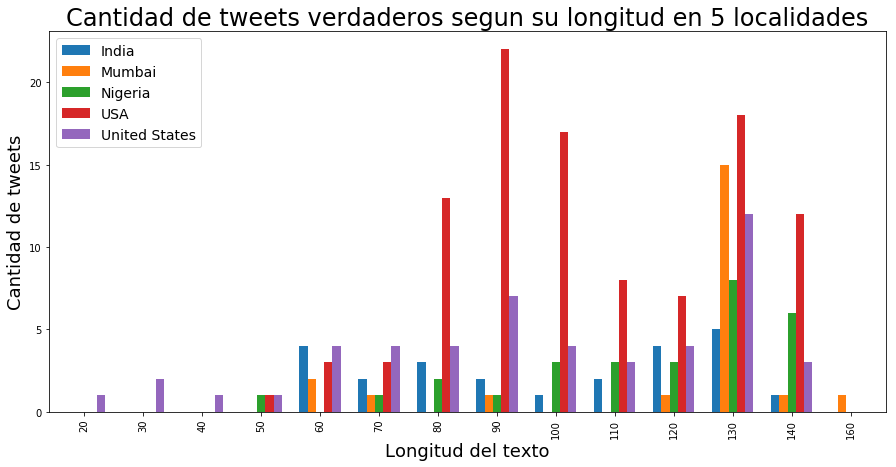

In [76]:
grafico = df_lugares_verdaderos.plot(kind='bar', figsize=(15,7), width=0.7)
grafico.set_title('Cantidad de tweets verdaderos segun su longitud en 5 localidades',fontsize=24)
grafico.set_xlabel('Longitud del texto',fontsize=18)
grafico.set_ylabel('Cantidad de tweets',fontsize=18)
grafico.legend(fontsize=14)

### Longitud del texto según la cantidad de palabras de un tweet de las 5 localidades con mayor cantidad de tweets 

In [77]:
entrenamiento_df['words_count'] = entrenamiento_df['text'].apply(lambda x: len(x.split(' ')))

In [78]:
entrenamiento_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 7 columns):
id               7613 non-null int64
keyword          7552 non-null object
location         7613 non-null object
text             7613 non-null object
target           7613 non-null int64
words_count      7613 non-null int64
longitud_text    7613 non-null int64
dtypes: int64(4), object(3)
memory usage: 475.8+ KB


In [79]:
scatter_df = entrenamiento_df
scatter_df['location'] = scatter_df['location'].fillna('Sin location')
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 7 columns):
id               7613 non-null int64
keyword          7552 non-null object
location         7613 non-null object
text             7613 non-null object
target           7613 non-null int64
words_count      7613 non-null int64
longitud_text    7613 non-null int64
dtypes: int64(4), object(3)
memory usage: 475.8+ KB


In [80]:
scatter_df['location'].value_counts()

Sin location                                    2533
USA                                              104
New York                                          71
United States                                     50
London                                            45
Canada                                            29
Nigeria                                           28
UK                                                27
Los Angeles, CA                                   26
India                                             24
Mumbai                                            22
Washington, DC                                    21
Kenya                                             20
Worldwide                                         19
Chicago, IL                                       18
Australia                                         18
California                                        17
Everywhere                                        15
California, USA                               

In [81]:
scatter_df[scatter_df['words_count']<4].groupby(['words_count','target']).agg({'target':['count']})

target
                    count
words_count target       
1           0           8
2           0          32
            1           9
3           0          63
            1          12

In [82]:
##Me quedo con los textos que tienen mas de 3 palabras
scatter_df = scatter_df[scatter_df['words_count']>3]
scatter_df['location'].value_counts()

Sin location                                    2479
USA                                              104
New York                                          70
United States                                     49
London                                            44
Canada                                            29
Nigeria                                           28
UK                                                27
Los Angeles, CA                                   26
India                                             24
Mumbai                                            22
Washington, DC                                    21
Kenya                                             20
Worldwide                                         19
Australia                                         18
Chicago, IL                                       17
California                                        16
New York, NY                                      15
Everywhere                                    

In [83]:
scatter_df['total'] = 1
location = scatter_df.groupby('location').agg({'total':'sum'})
location.columns = ['total']

location

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,total
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
45å¡ 5'12.53N 14å¡ 7'24.93E,1
"616 Û¢ Kentwood , MI",1
? ??????? ? ( ?? å¡ ? ? ? å¡),1
?currently writing a book?,1


In [84]:
location = location.sort_values('total',ascending=False).reset_index().loc[0:4,'location']
location

0     Sin location
1              USA
2         New York
3    United States
4           London
Name: location, dtype: object

In [85]:
scatter_df = scatter_df[scatter_df['location'].isin(location)]
scatter_df.head()

,id,keyword,location,text,target,words_count,longitud_text,total
0,1,NaN,Sin location,Our Deeds are the Reason of this #earthquake M...,1,13,69,1
1,4,NaN,Sin location,Forest fire near La Ronge Sask. Canada,1,7,38,1
2,5,NaN,Sin location,All residents asked to 'shelter in place' are ...,1,22,133,1
3,6,NaN,Sin location,"13,000 people receive #wildfires evacuation or...",1,9,65,1
4,7,NaN,Sin location,Just got sent this photo from Ruby #Alaska as ...,1,17,88,1


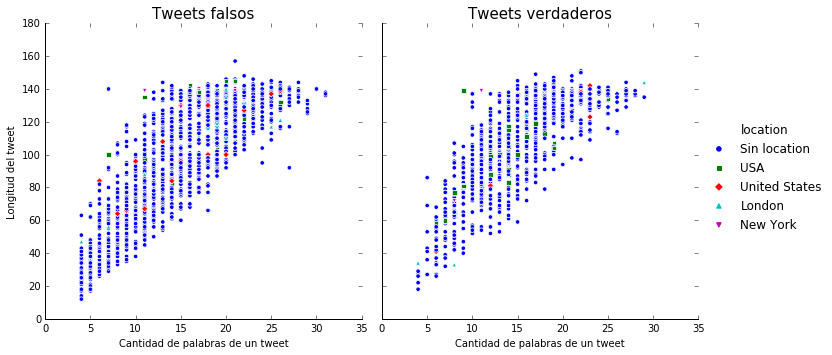

In [86]:
g = sns.relplot(x="words_count", y="longitud_text",
              col="target", hue="location", style="location", 
            kind="scatter", data=scatter_df).axes.flatten()


g[0].set_title("Tweets falsos",fontsize=15)
g[1].set_title("Tweets verdaderos",fontsize=15)
g[0].set_ylabel("Longitud del tweet",fontsize=10)
g[0].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)
g[1].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)

#### El gráfico termina siendo confuso ya que la mayor cantidad de tweets emitidos no poseen valores en la columna location 

In [131]:
##Vamos a eliminar esos valores nulos para determinar si el valor en esa columna es relevante
entrenamiento_df['words_count'] = entrenamiento_df['text'].apply(lambda x: len(x.split(' ')))
scatter_df = entrenamiento_df
scatter_df = entrenamiento_df.dropna(subset=['location'])
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 31 to 7581
Data columns (total 7 columns):
id               5080 non-null int64
keyword          5080 non-null object
location         5080 non-null object
text             5080 non-null object
target           5080 non-null int64
longitud_text    5080 non-null int64
words_count      5080 non-null int64
dtypes: int64(4), object(3)
memory usage: 317.5+ KB


In [132]:
scatter_df = scatter_df.loc[:,['location','target','longitud_text','words_count']]
scatter_df.head()

,location,target,longitud_text,words_count
31,Birmingham,1,55,5
32,Est. September 2012 - Bristol,0,67,10
33,AFRICA,1,82,9
34,"Philadelphia, PA",0,34,7
35,"London, UK",0,76,13


In [133]:
##Se observa la cantidad de tweets verdaderos con menos de 4 palabras 
scatter_df[scatter_df['words_count']<4].groupby(['words_count','target']).agg({'target':['count']})

target
                    count
words_count target       
1           0           3
2           0          17
            1           2
3           0          41
            1           7

In [134]:
##Menos cantidad de palabras mas probable de que sea falso -> Una palabra no puede es ambigua ya que no especifica a
## que hace referencia, se van a desestimar en el siguiente analisis
scatter_df = scatter_df[scatter_df['words_count']>3]
scatter_df['location'].value_counts()

USA                                             104
New York                                         70
United States                                    49
London                                           44
Canada                                           29
Nigeria                                          28
UK                                               27
Los Angeles, CA                                  26
India                                            24
Mumbai                                           22
Washington, DC                                   21
Kenya                                            20
Worldwide                                        19
Australia                                        18
Chicago, IL                                      17
California                                       16
Everywhere                                       15
California, USA                                  15
New York, NY                                     15
United Kingd

In [135]:
scatter_df['total'] = 1
location = scatter_df.groupby('location').agg({'total':'sum'})
location.columns = ['total']

location

,total
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
45å¡ 5'12.53N 14å¡ 7'24.93E,1
"616 Û¢ Kentwood , MI",1
? ??????? ? ( ?? å¡ ? ? ? å¡),1
?currently writing a book?,1


In [136]:
location = location.sort_values('total',ascending=False).reset_index().loc[0:4,'location']
location


0              USA
1         New York
2    United States
3           London
4           Canada
Name: location, dtype: object

In [137]:
##Se podría unificar USA & United States
scatter_df = scatter_df[scatter_df['location'].isin(location)]
scatter_df.head()

,location,target,longitud_text,words_count,total
55,USA,1,135,19,1
124,United States,0,130,15,1
158,Canada,1,136,18,1
199,Canada,0,102,9,1
203,USA,1,98,11,1


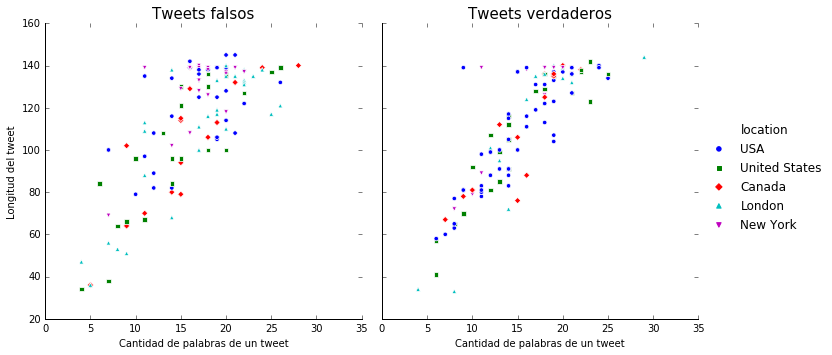

In [138]:
g = sns.relplot(x="words_count", y="longitud_text",
              col="target", hue="location", style="location", 
            kind="scatter", data=scatter_df).axes.flatten()


g[0].set_title("Tweets falsos",fontsize=15)
g[1].set_title("Tweets verdaderos",fontsize=15)
g[0].set_ylabel("Longitud del tweet",fontsize=10)
g[0].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)
g[1].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)

## Longitud del texto según la cantidad de palabras de un tweet de las 5 keyword con mayor cantidad de tweets

In [47]:
##Analisis similar al de las localidades con la diferencia que para las keyword nan se van a llenar con un valor por 
##defecto
scatter_df = entrenamiento_df
scatter_df['keyword'] = entrenamiento_df['keyword'].fillna('Sin keyword')
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 7 columns):
id               7613 non-null int64
keyword          7613 non-null object
location         5080 non-null object
text             7613 non-null object
target           7613 non-null int64
longitud_text    7613 non-null int64
words_count      7613 non-null int64
dtypes: int64(4), object(3)
memory usage: 475.8+ KB


In [48]:
scatter_df['keyword'].value_counts()

Sin keyword              61
fatalities               45
armageddon               42
deluge                   42
body%20bags              41
damage                   41
harm                     41
sinking                  41
twister                  40
fear                     40
evacuate                 40
windstorm                40
collided                 40
outbreak                 40
siren                    40
weapon                   39
wrecked                  39
derailment               39
collision                39
flames                   39
weapons                  39
hellfire                 39
whirlwind                39
sinkhole                 39
wreckage                 39
earthquake               39
sunk                     39
explosion                39
famine                   39
fire                     38
                         ..
wild%20fires             31
obliterated              31
hostage                  31
mayhem                   30
avalanche           

In [49]:
scatter_df['total'] = 1
keyword = scatter_df.groupby('keyword').agg({'total':'sum'})
keyword.columns = ['total']

keyword

,total
keyword,
Sin keyword,61
ablaze,36
accident,35
aftershock,34
airplane%20accident,35
ambulance,38
annihilated,34
annihilation,29
apocalypse,32


In [50]:
keyword = keyword.sort_values('total',ascending=False).reset_index().loc[0:4,'keyword']
keyword


0    Sin keyword
1     fatalities
2         deluge
3     armageddon
4        sinking
Name: keyword, dtype: object

In [51]:
##Se puede observar que los nulo de la columna location pudo inluir en los resultados del grafico anterior ya que 
##estos poseian una mayor cantidad que los nan de keyword
scatter_df = scatter_df[scatter_df['keyword'].isin(keyword)]
scatter_df.head()

,id,keyword,location,text,target,longitud_text,words_count,total
0,1,Sin keyword,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,1
1,4,Sin keyword,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,1
2,5,Sin keyword,NaN,All residents asked to 'shelter in place' are ...,1,133,22,1
3,6,Sin keyword,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,Sin keyword,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17,1


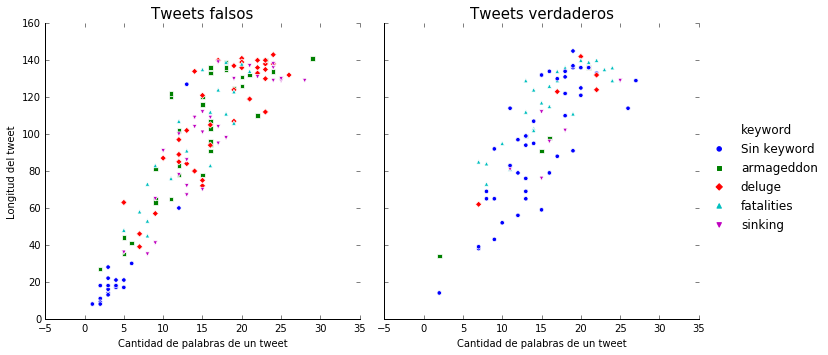

In [55]:
g = sns.relplot(x="words_count", y="longitud_text",
              col="target", hue="keyword", style="keyword", 
            kind="scatter", data=scatter_df).axes.flatten()


g[0].set_title("Tweets falsos",fontsize=15)
g[1].set_title("Tweets verdaderos",fontsize=15)
g[0].set_ylabel("Longitud del tweet",fontsize=10)
g[0].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)
g[1].set_xlabel("Cantidad de palabras de un tweet",fontsize=10)